### Red Wine Dataset Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('assets/wineQualityReds.csv')

In [3]:
data

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


There are 11 features with no null values contained within the dataset thus no data will need to be removed or imputed, column 0 appears to be an index column and will be dropped

In [5]:
data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [6]:
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


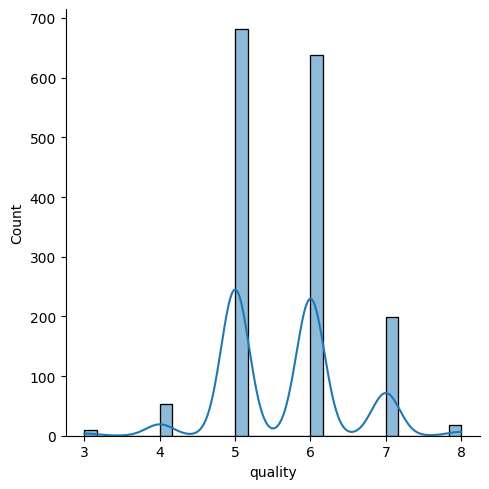

In [7]:
sns.displot(data.quality, kde=True)

The quality metric is a continuous variable, thus in order to estimate it we will need to use a regression model

Alternatively, we can instead choose to create buckets, which correspond to the quality of the wine, here is an example which makes use of the quartiles

In [8]:
def quality_label(x):
    if x < 5:
        return 'Low quality'
    elif x >= 5 and x <= 6:
        return 'Average quality'
    else:
        return 'Good Quality'

In [9]:
data['QualityLabel'] = [quality_label(x) for x in data.quality]

In [10]:
data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,QualityLabel
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Average quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Average quality
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Average quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Average quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Average quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Average quality
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Average quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Average quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Average quality


In [11]:
data.QualityLabel.value_counts()

QualityLabel
Average quality    1319
Good Quality        217
Low quality          63
Name: count, dtype: int64

Using Standard deviation

In [12]:
average = np.mean(data.quality)
std_dev = np.std(data.quality)

In [13]:
average-std_dev

4.828705637107343

In [14]:
def quality_label(x):
    if x < (average-1*std_dev):
        return 'Low quality'
    elif x >= (average-1*std_dev) and x <= (average+1*std_dev):
        return 'Average quality'
    elif x > (average+1*std_dev):
        return 'High quality'

In [15]:
data['QualityLabel'] = [quality_label(x) for x in data.quality]

In [16]:
data['QualityLabel'].value_counts()

QualityLabel
Average quality    1319
High quality        217
Low quality          63
Name: count, dtype: int64

#### Feature correlation exploration

Feature correlation explores the strength of the linear relationship between two variables.

In the below grid the corresponding feature on the x axis lines up with the corresponding feature on the y axis, the color intensity will give you a sense of the strength of the relationship.

The more red a square is the more strongly positively correlated it is, the more blue it is the more strongly negatively correlated it is.

As squares approach white, they represent a weak to no correlation.

In [17]:
feature_names = data.drop('QualityLabel',axis=1).columns.values
numeric_features = data.drop('QualityLabel',axis=1)
num_values =  [x for x in range(len(feature_names))]

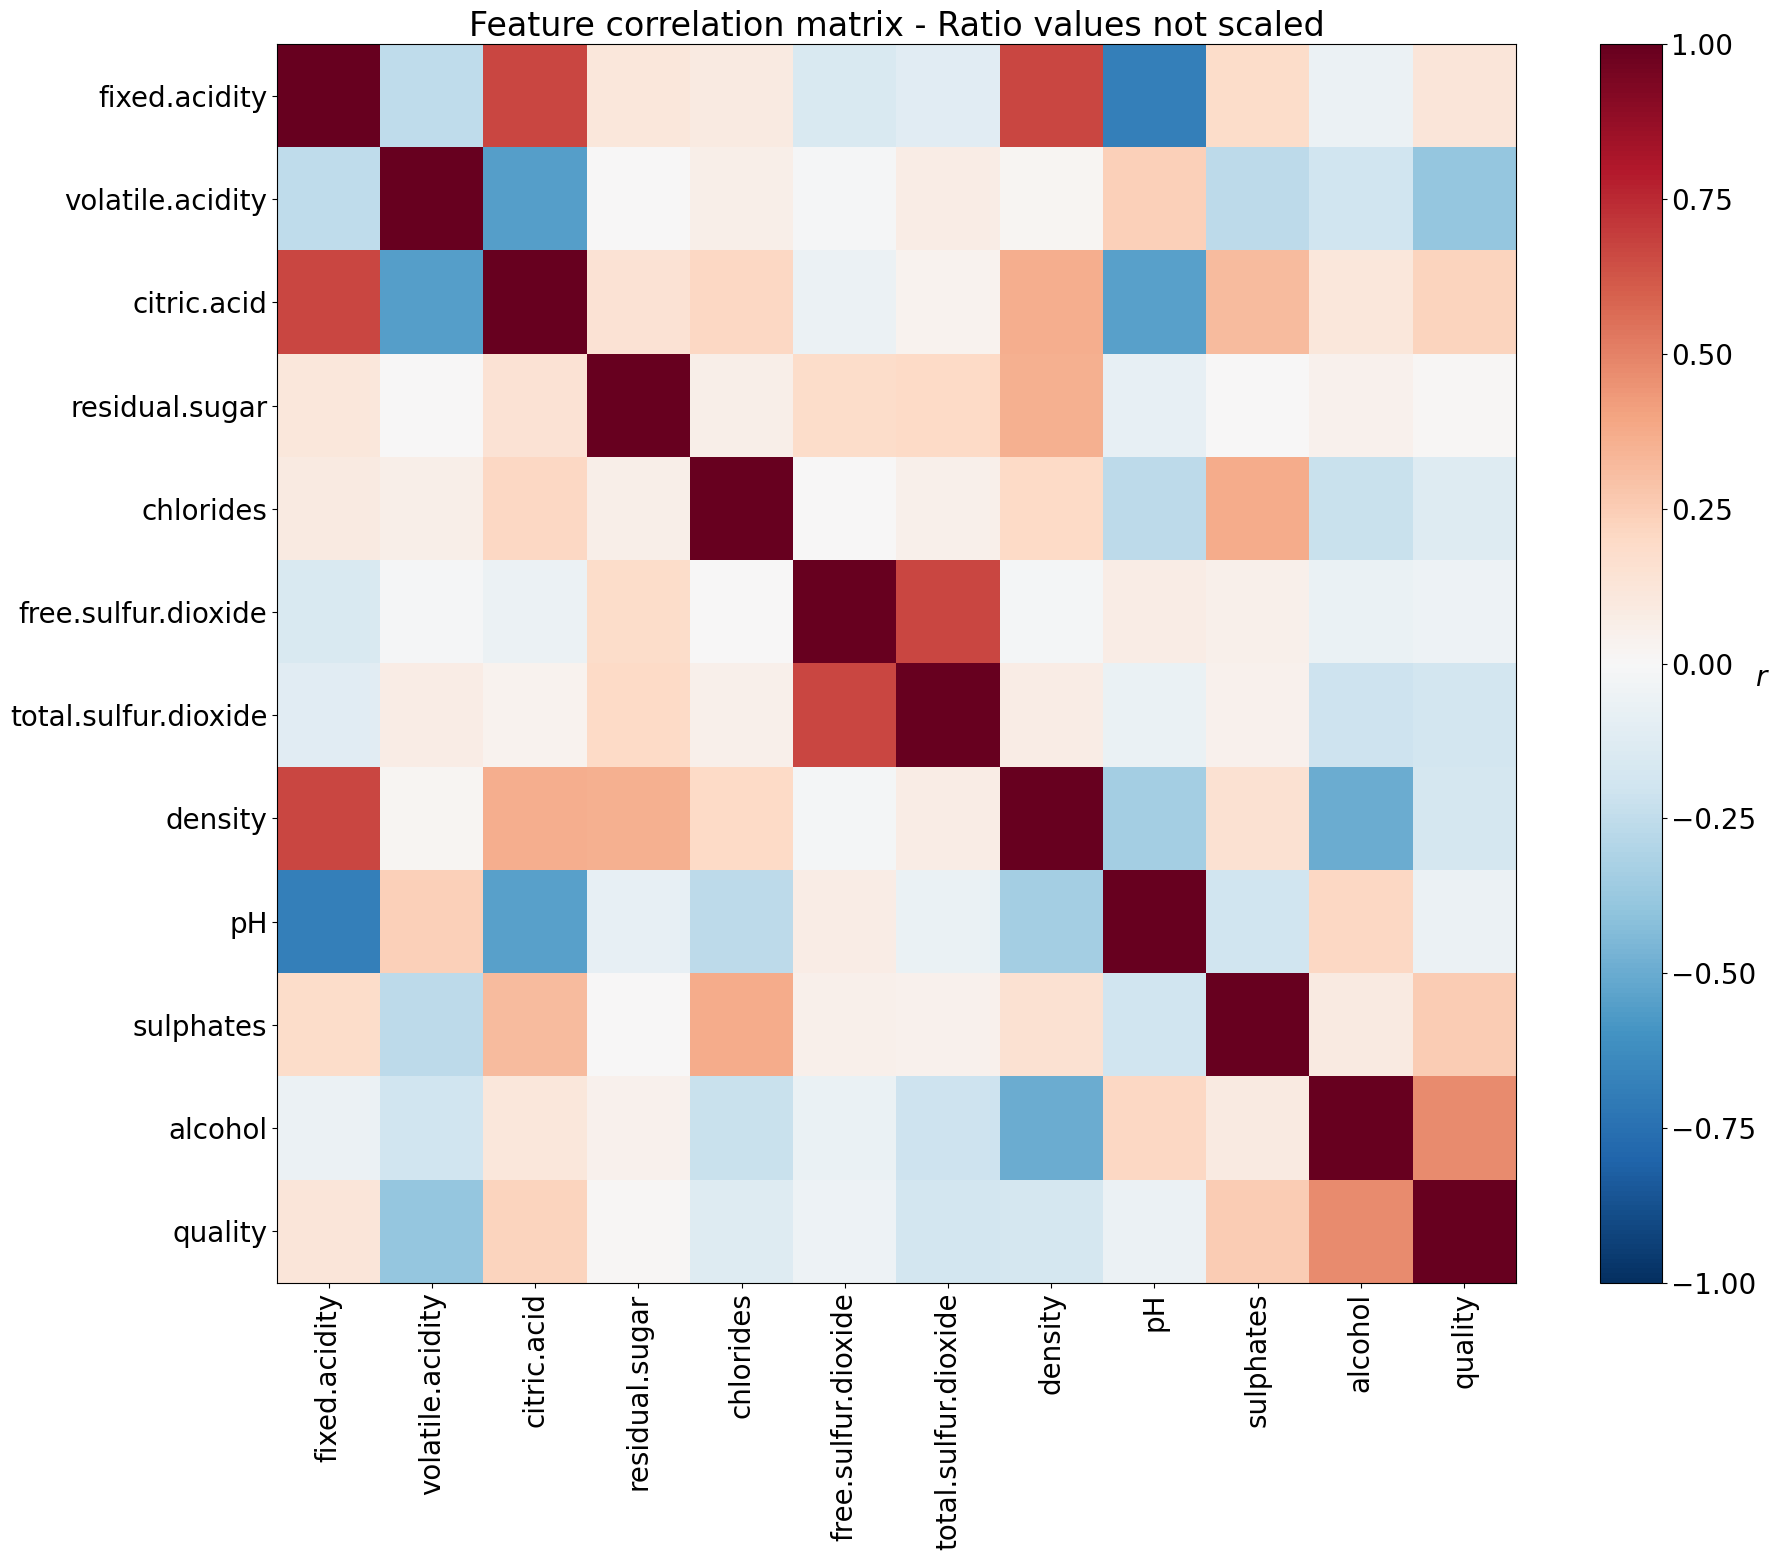

In [18]:
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=[20, 16])

ax = plt.axes()

im = ax.imshow(np.corrcoef(numeric_features.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks(num_values)
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks(num_values)
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Feature correlation matrix - Ratio values not scaled")
plt.tight_layout()

Below we can examine by using the feature correlation matrix which variables are most strongly correlated.

Here we can find which features are the most strongly correlated to each other, this may or may not signify potential multi-colinearity

In [19]:
correlation_matrix = np.corrcoef(numeric_features, rowvar=False)
highly_correlated_features = np.where(correlation_matrix > 0.8)

In [20]:
correlation_matrix = np.corrcoef(numeric_features, rowvar=False)
highly_correlated_indices = np.where(np.logical_or(correlation_matrix > 0.5, correlation_matrix < -0.5))

column_names = list(numeric_features.columns)

highly_correlated_features = []
for i in range(len(highly_correlated_indices[0])): 
    feature1_index = highly_correlated_indices[0][i]
    feature2_index = highly_correlated_indices[1][i]
    feature1_name = column_names[feature1_index]
    feature2_name = column_names[feature2_index]
    if feature1_name!=feature2_name:
        feature_pair = [feature1_name, feature2_name]
        feature_pair.sort()
        if feature_pair not in highly_correlated_features:
            highly_correlated_features.append(feature_pair)

for feature_pair in highly_correlated_features:
    print(feature_pair)

['citric.acid', 'fixed.acidity']
['density', 'fixed.acidity']
['fixed.acidity', 'pH']
['citric.acid', 'volatile.acidity']
['citric.acid', 'pH']
['free.sulfur.dioxide', 'total.sulfur.dioxide']


In [21]:
unique_features = list(set([feature for sublist in highly_correlated_features for feature in sublist]))

In [22]:
data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,QualityLabel
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Average quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Average quality
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Average quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Average quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Average quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Average quality
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Average quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Average quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Average quality


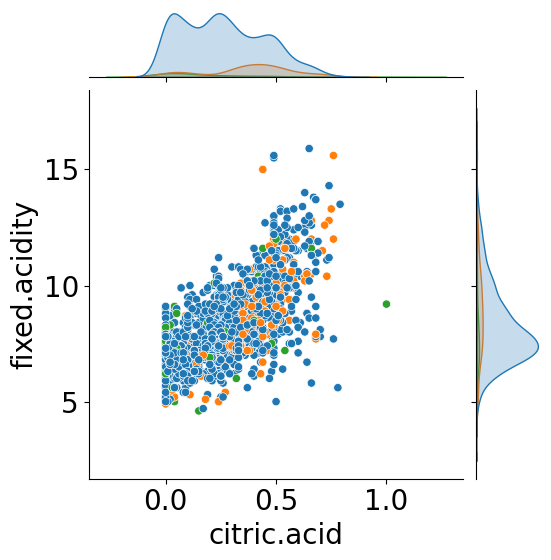

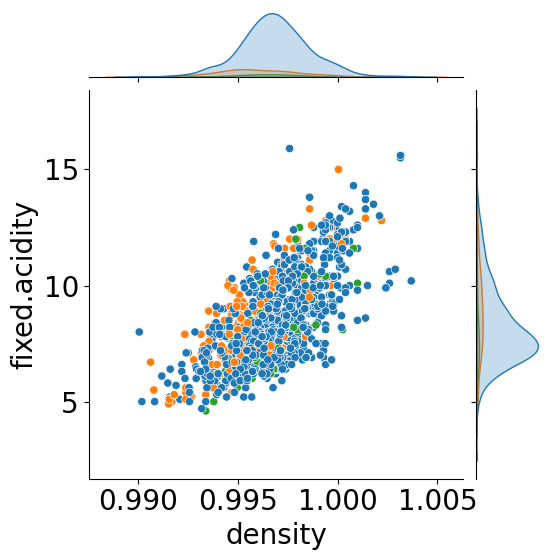

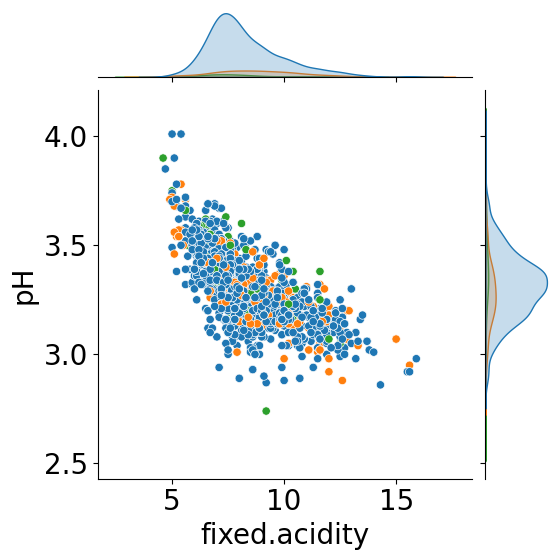

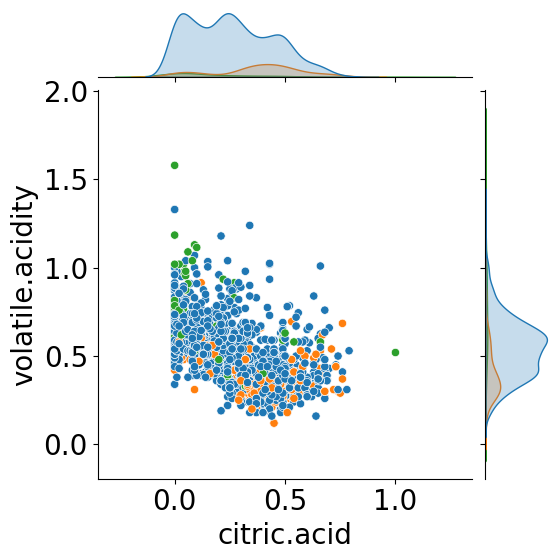

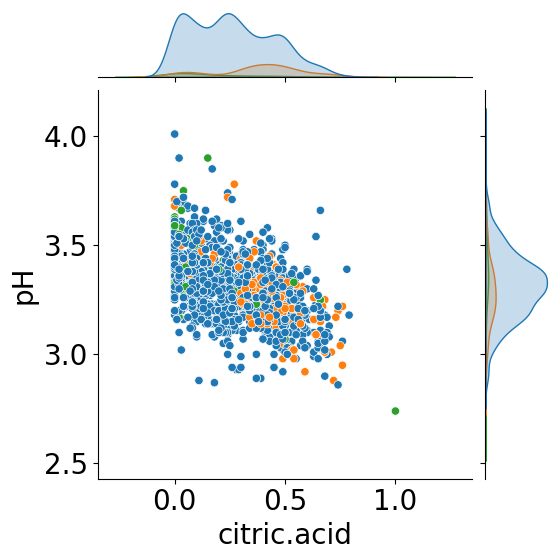

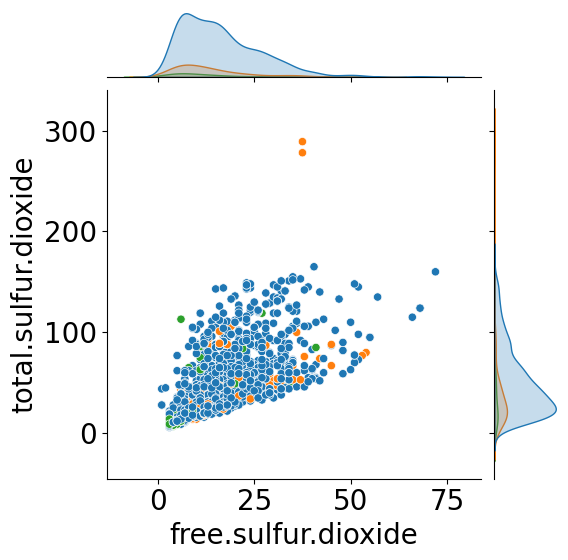

In [23]:
for pair in highly_correlated_features:
    sns.jointplot(data=data, x=pair[0], y=pair[1], hue="QualityLabel", legend=None)

#### Additional Feature correlation exploration

Using the correlation matrix, I explored additional variables and pair-wise assess their ability to discriminate between good and poor quality wine

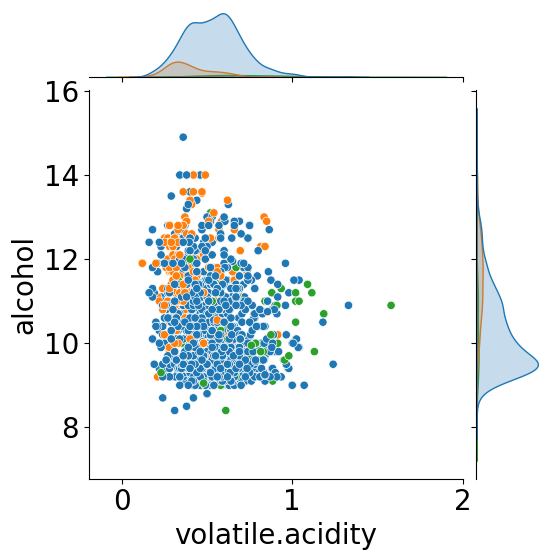

In [24]:
sns.jointplot(data=data, x="volatile.acidity", y="alcohol", hue="QualityLabel", legend=None)

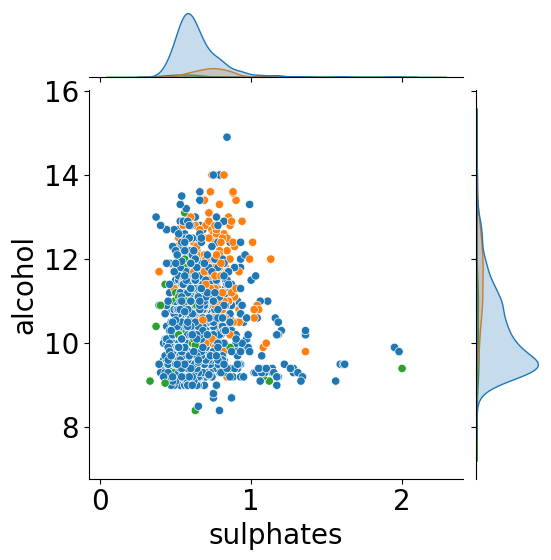

In [25]:
sns.jointplot(data=data, x="sulphates", y="alcohol", hue="QualityLabel", legend=None)

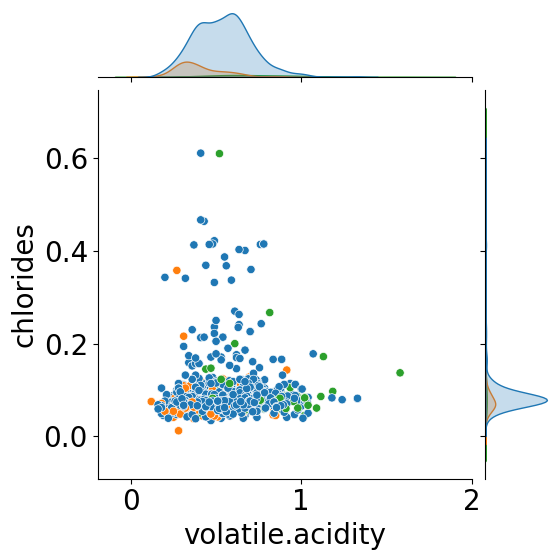

In [26]:
sns.jointplot(data=data, x="volatile.acidity", y="chlorides", hue="QualityLabel", legend=None)

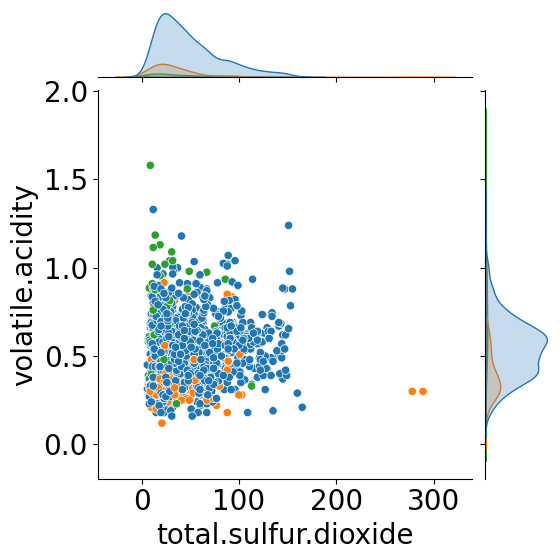

In [27]:
sns.jointplot(data=data, x="total.sulfur.dioxide", y="volatile.acidity", hue="QualityLabel", legend=None)

#### Evaluating normality and distribution type of the variables

Shapiro-Wilk test is used to determine if the column data is normally distributed. 

The test returns a test statistic and a p-value, which is then compared to a significance level (alpha) to make a decision about the normality of the data. If the p-value is greater than alpha, we fail to reject the null hypothesis and conclude that the data is normally distributed.

Otherwise, we reject the null hypothesis and conclude that the data is not normally distributed.

In [28]:
from scipy import stats

feature_dict = {}

for col in numeric_features.columns:
    column_data = data.loc[:,[col]]  # Replace this with your actual column data

    # Perform Shapiro-Wilk test for normality
    statistic, p_value = stats.shapiro(column_data)
    
    alpha = 0.05 
    
    if p_value < alpha:
        distribution = 'Normal'
    else:
        distribution = 'Not Normal'

    feature_dict[col] = (p_value, distribution)

In [29]:
feature_dict

{'fixed.acidity': (1.5227779442162196e-24, 'Normal'),
 'volatile.acidity': (2.686385373947307e-16, 'Normal'),
 'citric.acid': (1.0233944777578548e-21, 'Normal'),
 'residual.sugar': (0.0, 'Normal'),
 'chlorides': (0.0, 'Normal'),
 'free.sulfur.dioxide': (7.699692533903026e-31, 'Normal'),
 'total.sulfur.dioxide': (3.573768919849872e-34, 'Normal'),
 'density': (1.9199848821926935e-08, 'Normal'),
 'pH': (1.7218767425219994e-06, 'Normal'),
 'sulphates': (5.821617678881608e-38, 'Normal'),
 'alcohol': (6.63998167657323e-27, 'Normal'),
 'quality': (9.524199756965729e-36, 'Normal')}

<Axes: xlabel='residual.sugar', ylabel='Density'>

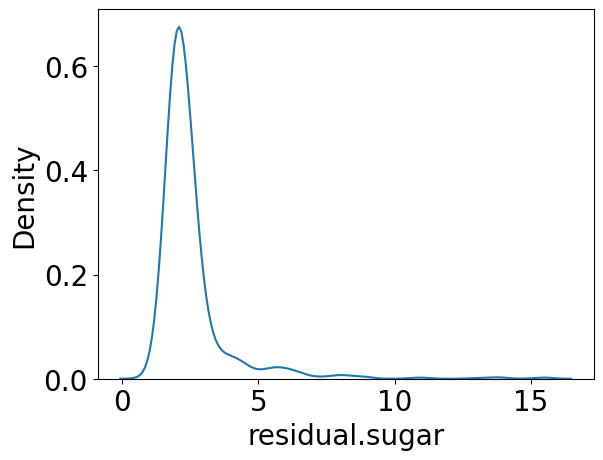

In [30]:
sns.kdeplot(numeric_features['residual.sugar'])

In [31]:
numeric_features['residual.sugar'].mean(), numeric_features['residual.sugar'].mode(), numeric_features['residual.sugar'].median()

(2.53880550343965,
 0    2.0
 Name: residual.sugar, dtype: float64,
 2.2)

<Axes: xlabel='sulphates', ylabel='Density'>

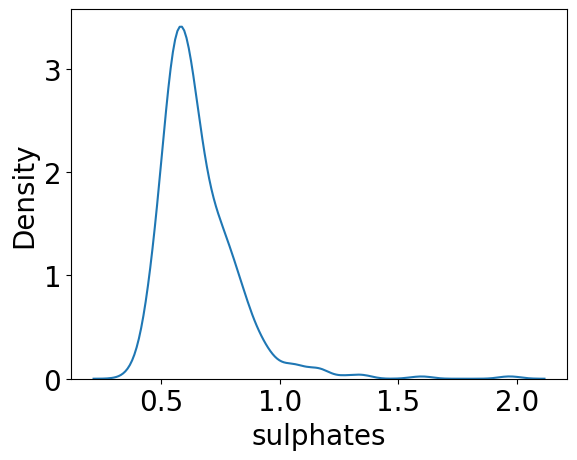

In [32]:
sns.kdeplot(numeric_features['sulphates'])

In [33]:
numeric_features['sulphates'].mean(), numeric_features['sulphates'].mode(), numeric_features['sulphates'].median()

(0.6581488430268917,
 0    0.6
 Name: sulphates, dtype: float64,
 0.62)

<Axes: xlabel='alcohol', ylabel='Density'>

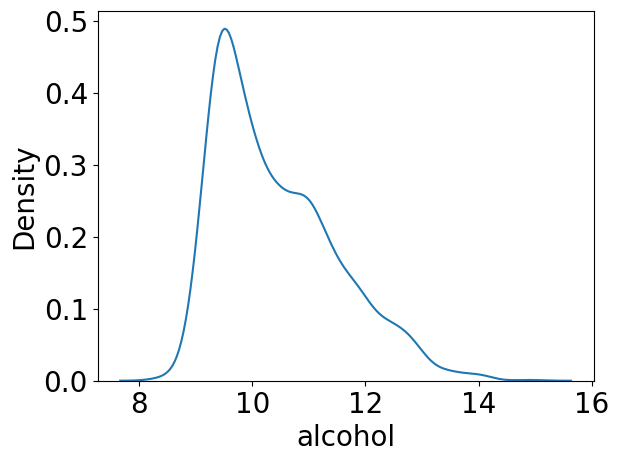

In [34]:
sns.kdeplot(numeric_features['alcohol'])

In [35]:
numeric_features['alcohol'].mean(), numeric_features['alcohol'].mode(), numeric_features['alcohol'].median()

(10.422983114446529,
 0    9.5
 Name: alcohol, dtype: float64,
 10.2)

#### Detecting outliers

Below we will evaluate a method to detect significant outliers, these are values which deviate substantially from the mean of their respective distributions and therefore can be considered rare events or outliers.

These extreme values can have a significant impact on the distribution of a variable and impact our ability to capture the variance and generalize well.

In [36]:
# Calculate the mean and standard deviation of each feature
means = np.mean(numeric_features, axis=0)
std_devs = np.std(numeric_features, axis=0)

# Define the threshold for outliers (e.g., 3 standard deviations from the mean)
threshold = 3

# Calculate the z-scores for each data point
z_scores = np.abs((numeric_features - means) / std_devs)

# Remove outliers from the dataset
cleaned_data = numeric_features[(z_scores < threshold).all(axis=1)]

# Print the original and cleaned dataset sizes
print("Original dataset size:", numeric_features.shape)
print("Cleaned dataset size:", cleaned_data.shape)

Original dataset size: (1599, 12)
Cleaned dataset size: (1451, 12)


In [37]:
cleaned_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Standardizing the dataset using a StandardScaler

This applies normal scaling to each data column, as previously shown each value is normally distributed, thus this scaler is appropriate.

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
standardized_data = pd.DataFrame(scaler.fit_transform(cleaned_data.iloc[:, :-1]), 
                                 columns = cleaned_data.iloc[:, :-1].columns)

Finding features with multi-colinearity

Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the predictor variables. 

This can create challenges in the regression analysis because it becomes difficult to determine the individual effects of each independent variable on the dependent variable accurately.

<p>
<li>VIF equal to 1 = variables are not correlated</li>
<li>VIF between 1 and 5 = variables are moderately correlated</li>
<li>VIF greater than 5 = variables are highly correlated</li>
</p>

In [41]:
# Import required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import time

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = standardized_data.columns

# Start the timer
start_time = time.time()

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(add_constant(standardized_data).values, i)
                   for i in range(len(standardized_data.columns))]

# Calculate the time taken in minutes
end_time = time.time()
time_taken_minutes = (end_time - start_time) / 60

# Print VIF results and time taken
print(vif_data)
print("Time taken for VIF calculation: {:.2f} minutes".format(time_taken_minutes))

                 feature       VIF
0          fixed.acidity  1.000000
1       volatile.acidity  7.942437
2            citric.acid  1.861970
3         residual.sugar  3.191798
4              chlorides  1.653039
5    free.sulfur.dioxide  1.171792
6   total.sulfur.dioxide  1.933500
7                density  2.185633
8                     pH  6.418063
9              sulphates  3.214298
10               alcohol  1.309630
Time taken for VIF calculation: 0.00 minutes


Removing multi-colinear features to review impact on VIF

In [42]:
reduced_data = standardized_data.loc[:,vif_data.loc[vif_data['VIF'] <= 5, 'feature'].values]

vif_data = pd.DataFrame()
vif_data["feature"] = reduced_data.columns

# Start the timer
start_time = time.time()

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(add_constant(reduced_data).values, i)
                   for i in range(len(reduced_data.columns))]

# Calculate the time taken in minutes
end_time = time.time()
time_taken_minutes = (end_time - start_time) / 60

# Print VIF results and time taken
print(vif_data)
print("Time taken for VIF calculation: {:.2f} minutes".format(time_taken_minutes))

                feature       VIF
0         fixed.acidity  1.000000
1           citric.acid  3.744230
2        residual.sugar  2.267625
3             chlorides  1.525608
4   free.sulfur.dioxide  1.132998
5  total.sulfur.dioxide  1.887974
6               density  2.077380
7             sulphates  4.231668
8               alcohol  1.239664
Time taken for VIF calculation: 0.00 minutes


It is interesting to note here that the VIF of citric acid and sulphates have both increased post removal of volatile acidity and pH, whereas the rest have decreased

Below are the variables we are going to keep, only removing two in total

In [43]:
print(vif_data.loc[vif_data['VIF'] <= 5, 'feature'].values)

['fixed.acidity' 'citric.acid' 'residual.sugar' 'chlorides'
 'free.sulfur.dioxide' 'total.sulfur.dioxide' 'density' 'sulphates'
 'alcohol']


In [44]:
reduced_data = standardized_data.loc[:,vif_data.loc[vif_data['VIF'] <= 5, 'feature'].values]

#### Estimating Quality

In [45]:
X = reduced_data
y = cleaned_data.iloc[:, -1]

In [46]:
X

,fixed.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,sulphates,alcohol
0,-0.552930,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,-0.636458,-0.999856
1,-0.309900,-1.390400,0.246832,0.790825,1.063255,0.790477,0.052390,0.288353,-0.608174
2,-0.309900,-1.180831,-0.101284,0.504550,-0.011256,0.348768,0.169009,0.057150,-0.608174
3,1.755851,1.543569,-0.565439,-0.306564,0.203646,0.552634,0.752103,-0.482323,-0.608174
4,-0.552930,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,-0.636458,-0.999856
...,...,...,...,...,...,...,...,...,...
1446,-1.282019,-0.971261,-0.449401,0.409125,1.815413,0.008992,-1.055489,-0.482323,0.077270
1447,-1.464291,-0.866477,-0.217323,-0.926828,2.567570,0.246835,-0.927209,0.904894,0.762714
1448,-1.221261,-0.709300,-0.101284,-0.258851,1.493059,-0.126918,-0.565690,0.827826,0.566873
1449,-1.464291,-0.761692,-0.449401,-0.306564,1.815413,0.008992,-0.723125,0.519556,-0.216491


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 9)
(436, 9)
(1015,)
(436,)


In [48]:
reg_rf = RandomForestRegressor(max_depth=4, random_state=0, criterion='squared_error')

reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [49]:
preds_train = reg_rf.predict(X_train)
preds_test = reg_rf.predict(X_test)

In [50]:
mae = metrics.mean_absolute_error(y_train, preds_train)
print('MAE Train: %.5f' % mae)

mae = metrics.mean_absolute_error(y_test, preds_test)
print('MAE Test: %.5f' % mae)

mse = metrics.mean_squared_error(y_train, preds_train)
print('MSE Train: %.5f' % mse)

mse = metrics.mean_squared_error(y_test, preds_test)
print('MSE Test: %.5f' % mse)

MAE Train: 0.44833
MAE Test: 0.48449
MSE Train: 0.31083
MSE Test: 0.37483


In [51]:
metrics.r2_score(y_test, preds_test)

0.3095756434936404

In [52]:
from sklearn import linear_model

In [53]:
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [54]:
preds_train = reg.predict(X_train)
preds_test = reg.predict(X_test)

In [55]:
mae = metrics.mean_absolute_error(y_train, preds_train)
print('MAE Train: %.5f' % mae)

mae = metrics.mean_absolute_error(y_test, preds_test)
print('MAE Test: %.5f' % mae)

mse = metrics.mean_squared_error(y_train, preds_train)
print('MSE Train: %.5f' % mse)

mse = metrics.mean_squared_error(y_test, preds_test)
print('MSE Test: %.5f' % mse)

MAE Train: 0.49085
MAE Test: 0.48058
MSE Train: 0.39626
MSE Test: 0.38080


In [56]:
metrics.r2_score(y_test, preds_test)

0.298584021711103

In [57]:
reg_p = linear_model.PoissonRegressor(alpha=1e-10, solver="newton-cholesky")

reg_p.fit(X_train, y_train)

PoissonRegressor(alpha=1e-10, solver='newton-cholesky')

In [58]:
preds_train = reg_p.predict(X_train)
preds_test = reg_p.predict(X_test)

In [59]:
mae = metrics.mean_absolute_error(y_train, preds_train)
print('MAE Train: %.5f' % mae)

mae = metrics.mean_absolute_error(y_test, preds_test)
print('MAE Test: %.5f' % mae)

mse = metrics.mean_squared_error(y_train, preds_train)
print('MSE Train: %.5f' % mse)

mse = metrics.mean_squared_error(y_test, preds_test)
print('MSE Test: %.5f' % mse)

MAE Train: 0.49065
MAE Test: 0.48170
MSE Train: 0.39355
MSE Test: 0.37961


In [60]:
metrics.r2_score(y_test, preds_test)

0.3007676541141151

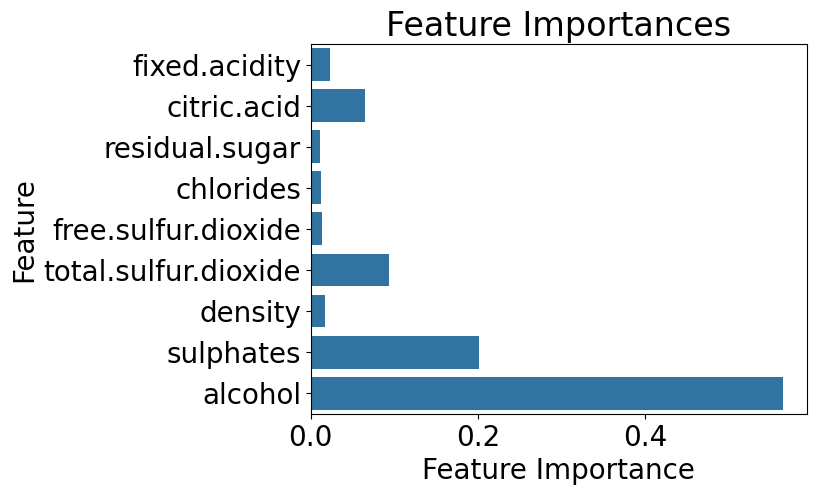

In [61]:
# Visualize feature importances
feature_importances = reg_rf.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#### Visualizing the predicted outcomes

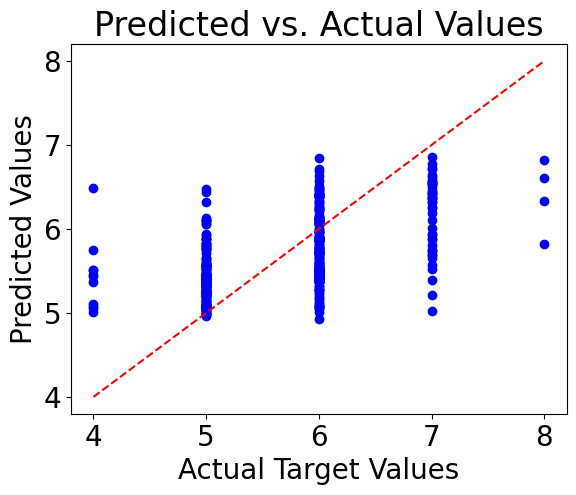

In [62]:
# Visualize actual vs. predicted values
plt.scatter(y_test, reg_rf.predict(X_test), color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

### Visualizing the predictions including the x - values

Since this is a multi-variate problem, it is difficult to appreciate how the model has been able to generalize in higher dimensions of space without taking the x - values into consideration.

The problem is there are 9 variables and we are not able to visualize 9 extra axes successfully. The way that we can do this however, is to use PCA to extract as much information regarding the variance of these variables and use it to reduce the information down to just one extra axis. 

We can then use this within a 3-dimensional plot to view the estimation within a more complete feature space.

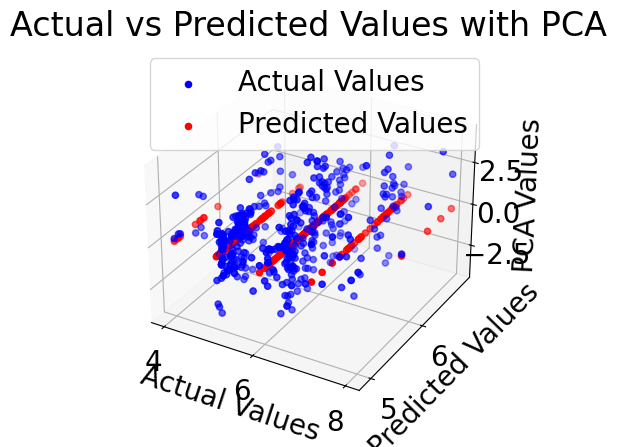

In [63]:
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.decomposition import PCA 

# Make predictions on the test set
y_pred = reg_rf.predict(X_test)

# Apply PCA to reduce features to 1 dimension for visualization
pca = PCA(n_components=1)
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted vs actual values using PCA values as a third dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_test, y_pred, X_test_pca, color='blue', label='Actual Values')
ax.scatter(y_test, y_pred, np.zeros_like(y_pred), color='red', label='Predicted Values')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('PCA Values')
plt.title('Actual vs Predicted Values with PCA')
plt.legend()
plt.show()
